**Q:Import data and check null values, column info, and descriptive statistics of the data.**


In [2]:
import pandas as pd

data = pd.read_excel('COVID-19 Daily.xlsx')

# Check for null values
null_values = data.isnull().sum()

# Check column info
info = data.info()

# Get descriptive statistics
descriptive_stats = data.describe()

# Output
print("Null Values:\n", null_values)
print("\nColumn Info:\n", info)
print("\nDescriptive Statistics:\n", descriptive_stats)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              188 non-null    datetime64[ns]
 1   Daily Tests       175 non-null    float64       
 2   Daily Cases       177 non-null    float64       
 3   Daily Recoveries  173 non-null    float64       
 4   Daily Deaths      131 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.5 KB
Null Values:
 Date                 0
Daily Tests         13
Daily Cases         11
Daily Recoveries    15
Daily Deaths        57
dtype: int64

Column Info:
 None

Descriptive Statistics:
                       Date   Daily Tests  Daily Cases  Daily Recoveries  \
count                  188    175.000000   177.000000        173.000000   
mean   2020-05-29 12:00:00  14927.297143  1673.028249       1590.930636   
min    2020-02-26 00:00:00      0.000000     0

**Q: Perform different type of analysis based on following diagrams on Daily Tests, Cases, Recoveries, Death. For sample we have mentioned tests below but implement same on others as well**

**Testing:**

How many total tests were performed till September 01, 2020?

Perform Daily Testing Trend Line Graph, Scattered Diagram and Bar Graph.

Show Scatter diagram of above-average(red color) and below-average(green color) daily testing.

<ipython-input-3-8df2ae097861>:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0', '5k', '10k', '15k', '20k', '25k', '30k'])


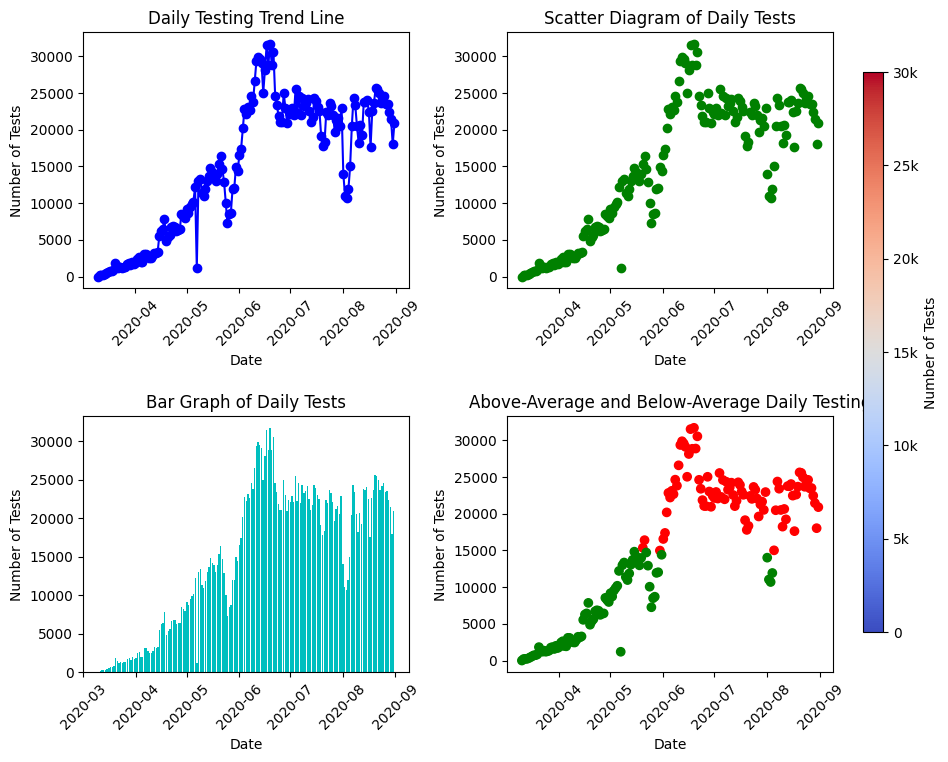

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

df=data
# Convert 'Date' to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Calculate average for color coding
average_tests = df['Daily Tests'].mean()

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot 1: Daily Testing Trend Line
axs[0, 0].plot(df['Date'], df['Daily Tests'], marker='o', linestyle='-', color='b', label='Daily Tests')
axs[0, 0].set_title('Daily Testing Trend Line')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Number of Tests')
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Scatter Diagram of Daily Tests
axs[0, 1].scatter(df['Date'], df['Daily Tests'], color='g', label='Daily Tests')
axs[0, 1].set_title('Scatter Diagram of Daily Tests')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Number of Tests')
axs[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Bar Graph of Daily Tests
axs[1, 0].bar(df['Date'], df['Daily Tests'], color='c', label='Daily Tests')
axs[1, 0].set_title('Bar Graph of Daily Tests')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Number of Tests')
axs[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Scatter Diagram of Above-Average and Below-Average Daily Testing
colors = ['r' if x > average_tests else 'g' for x in df['Daily Tests']]
scatter = axs[1, 1].scatter(df['Date'], df['Daily Tests'], color=colors, label='Daily Tests')
axs[1, 1].set_title('Above-Average and Below-Average Daily Testing')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Number of Tests')
axs[1, 1].tick_params(axis='x', rotation=45)

# Adjust the layout to increase space between subplots
plt.subplots_adjust(left=0.1, right=0.85, top=0.9, bottom=0.1, wspace=0.3, hspace=0.5)

# Create a color bar
norm = mcolors.Normalize(vmin=0, vmax=30000)
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])

# Add the color bar to the figure
cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Number of Tests')
cbar.ax.set_yticklabels(['0', '5k', '10k', '15k', '20k', '25k', '30k'])

plt.show()

**Q:Convert the dataset into weekly & monthly stats and perform save operations as above performed on daily tests. Also find max and min number of weekly & monthly tests, cases,recoveries and deaths with dates.**

In [4]:
# Convert to weekly and monthly data
weekly_data = data.resample('W-Mon', on='Date').sum().reset_index()
monthly_data = data.resample('M', on='Date').sum().reset_index()

# Save weekly and monthly stats
weekly_data.to_csv('weekly_data.csv', index=False)
monthly_data.to_csv('monthly_data.csv', index=False)

# Max and Min values for weekly and monthly stats
weekly_max_tests = weekly_data.loc[weekly_data['Daily Tests'].idxmax()]
weekly_min_tests = weekly_data.loc[weekly_data['Daily Tests'].idxmin()]
monthly_max_tests = monthly_data.loc[monthly_data['Daily Tests'].idxmax()]
monthly_min_tests = monthly_data.loc[monthly_data['Daily Tests'].idxmin()]

print("Weekly Max Tests:", weekly_max_tests)
print("Weekly Min Tests:", weekly_min_tests)
print("Monthly Max Tests:", monthly_max_tests)
print("Monthly Min Tests:", monthly_min_tests)

Weekly Max Tests: Date                2020-06-22 00:00:00
Daily Tests                    204096.0
Daily Cases                     36113.0
Daily Recoveries                17081.0
Daily Deaths                      856.0
Name: 16, dtype: object
Weekly Min Tests: Date                2020-03-02 00:00:00
Daily Tests                         0.0
Daily Cases                         0.0
Daily Recoveries                    0.0
Daily Deaths                        0.0
Name: 0, dtype: object
Monthly Max Tests: Date                2020-06-30 00:00:00
Daily Tests                    745419.0
Daily Cases                    141010.0
Daily Recoveries                74519.0
Daily Deaths                     2852.0
Name: 4, dtype: object
Monthly Min Tests: Date                2020-02-29 00:00:00
Daily Tests                         0.0
Daily Cases                         0.0
Daily Recoveries                    0.0
Daily Deaths                        0.0
Name: 0, dtype: object


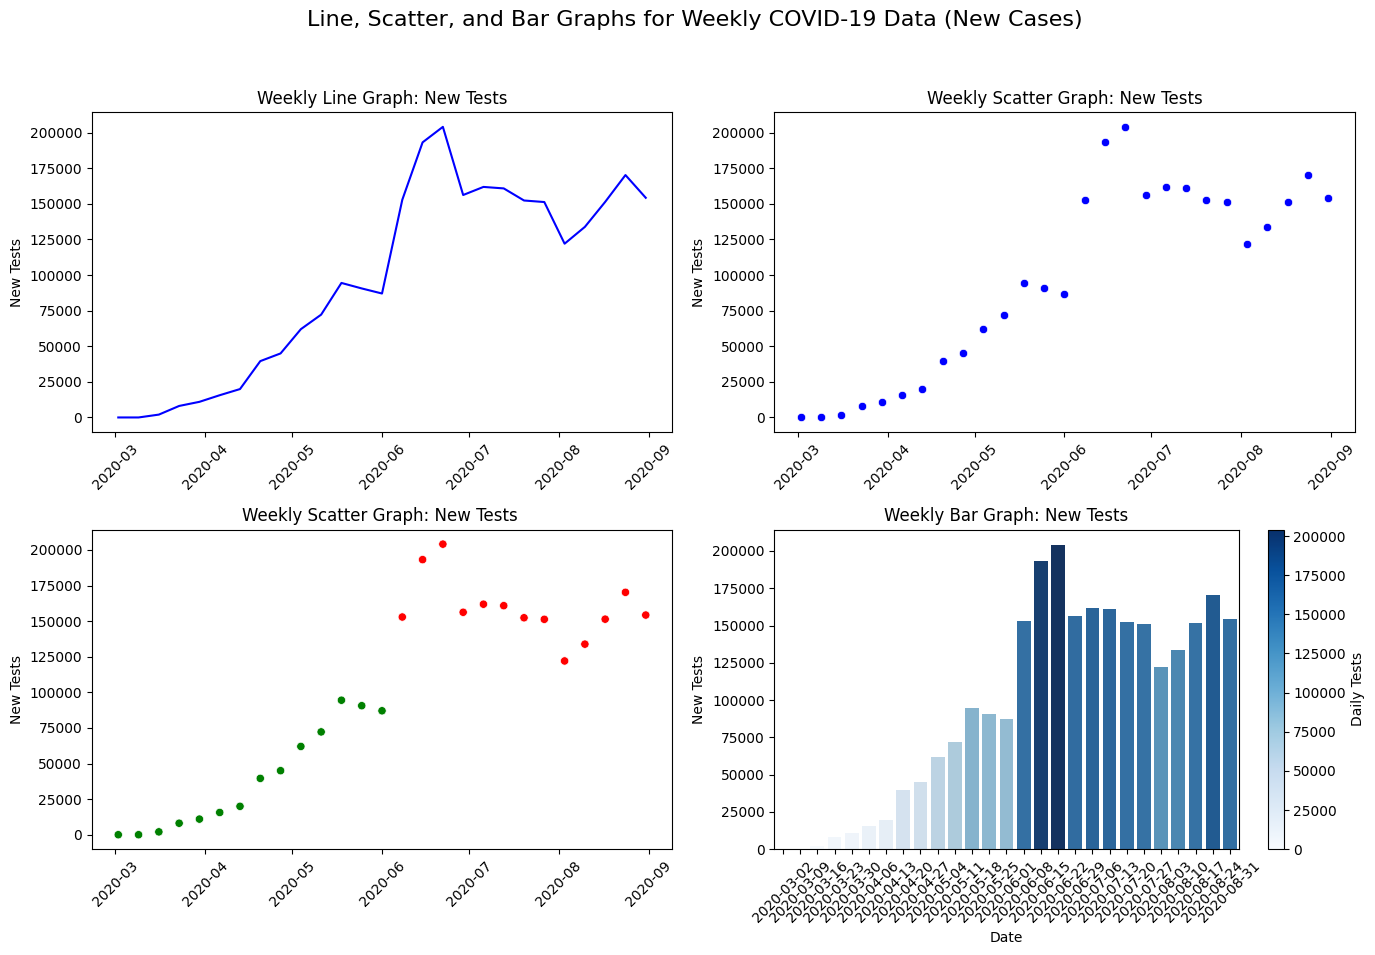

In [5]:
import seaborn as sns
# Create a 2x2 subplot layout for various graph types
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Line, Scatter, and Bar Graphs for Weekly COVID-19 Data (New Cases)', fontsize=16)

# Line Graph for Daily Tests (Weekly)
sns.lineplot(ax=axes[0, 0], x='Date', y='Daily Tests', data=weekly_data, color='blue')
axes[0, 0].set_title('Weekly Line Graph: New Tests')
axes[0, 0].set_ylabel('New Tests')
axes[0, 0].set_xlabel('')
axes[0, 0].tick_params(axis='x', rotation=45)

# Scatter Graph for Daily Tests (Weekly) - Simple
sns.scatterplot(ax=axes[0, 1], x='Date', y='Daily Tests', data=weekly_data, color='blue')
axes[0, 1].set_title('Weekly Scatter Graph: New Tests')
axes[0, 1].set_ylabel('New Tests')
axes[0, 1].set_xlabel('')
axes[0, 1].tick_params(axis='x', rotation=45)

# Calculate the average Daily Tests
avg_test = weekly_data['Daily Tests'].mean()

# Create a new column for color based on the average
weekly_data['Color'] = np.where(weekly_data['Daily Tests'] > avg_test, 'red', 'green')

# Define the colormap for the bar graph
cmap_bar = sns.color_palette("Blues", as_cmap=True)

# Create the scatter plots with colors directly
colors = weekly_data['Color'].tolist()
sns.scatterplot(ax=axes[1, 0], x='Date', y='Daily Tests', data=weekly_data, color=colors)
axes[1, 0].set_title('Weekly Scatter Graph: New Tests ')
axes[1, 0].set_ylabel('New Tests')
axes[1, 0].set_xlabel('')
axes[1, 0].tick_params(axis='x', rotation=45)

# Bar Graph for Daily Tests (Weekly) with colorbar
sns.barplot(ax=axes[1, 1], x='Date', y='Daily Tests', data=weekly_data, hue='Daily Tests', palette=cmap_bar, legend=False)
axes[1, 1].set_title('Weekly Bar Graph: New Tests')
axes[1, 1].set_ylabel('New Tests')
axes[1, 1].tick_params(axis='x', rotation=45)

sm = plt.cm.ScalarMappable(cmap=cmap_bar, norm=plt.Normalize(vmin=weekly_data['Daily Tests'].min(), vmax=weekly_data['Daily Tests'].max()))
sm.set_array([])
fig.colorbar(sm, label='Daily Tests', orientation='vertical', ax=axes[1, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

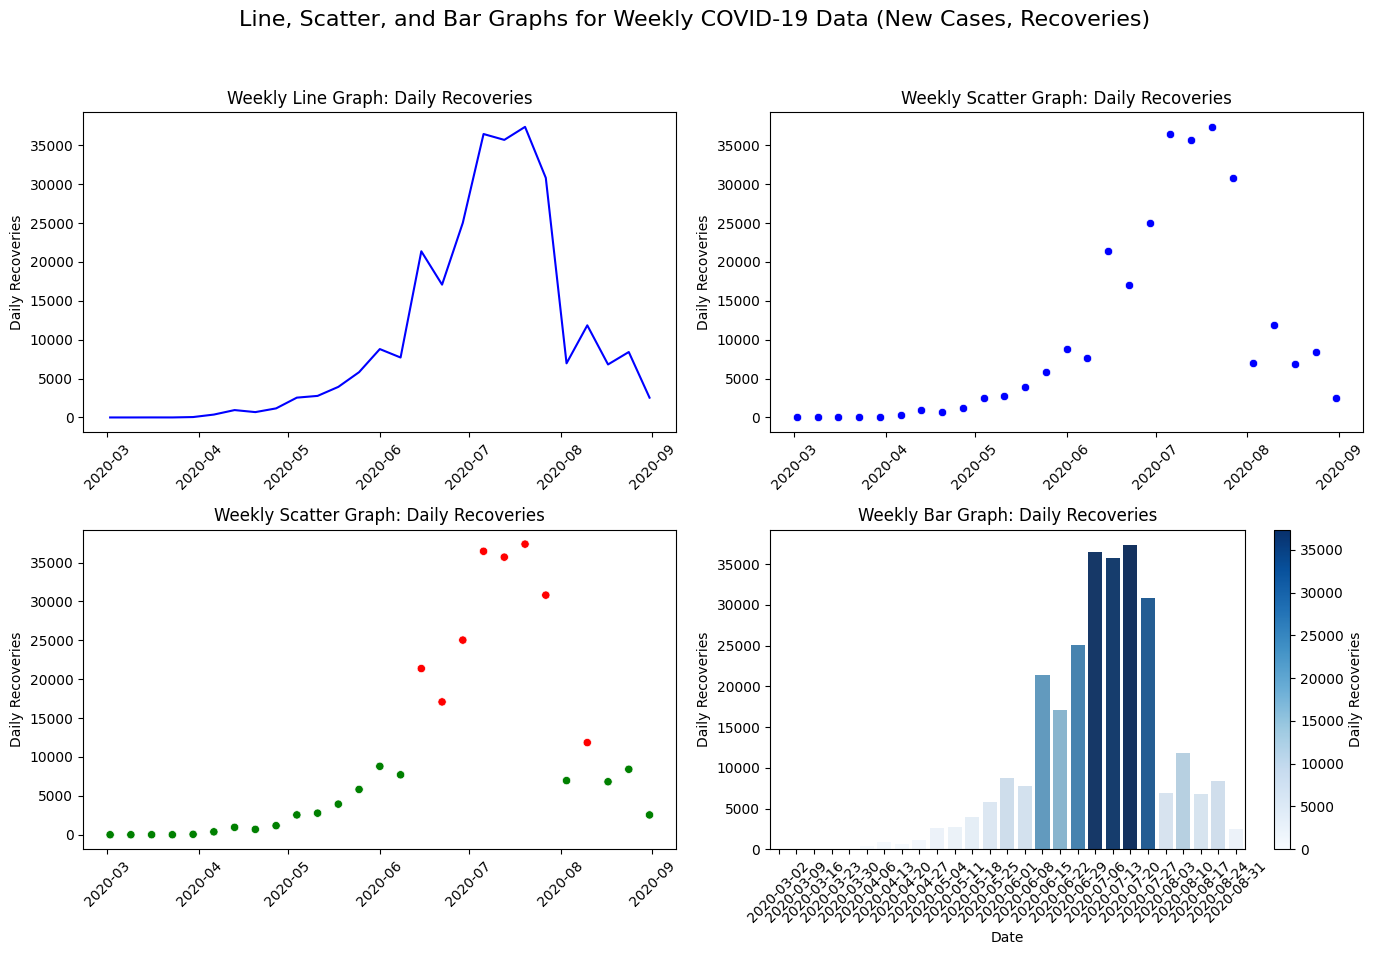

In [6]:
# Create a 2x2 subplot layout for various graph types
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Line, Scatter, and Bar Graphs for Weekly COVID-19 Data (New Cases, Recoveries)', fontsize=16)

sns.lineplot(ax=axes[0, 0], x='Date', y='Daily Recoveries', data=weekly_data, color='blue')
axes[0, 0].set_title('Weekly Line Graph: Daily Recoveries')
axes[0, 0].set_ylabel('Daily Recoveries')
axes[0, 0].set_xlabel('')
axes[0, 0].tick_params(axis='x', rotation=45)

# Scatter Graph for New Cases (Weekly) - Simple
sns.scatterplot(ax=axes[0, 1], x='Date', y='Daily Recoveries', data=weekly_data, color='blue')
axes[0, 1].set_title('Weekly Scatter Graph: Daily Recoveries')
axes[0, 1].set_ylabel('Daily Recoveries')
axes[0, 1].set_xlabel('')
axes[0, 1].tick_params(axis='x', rotation=45)

# Scatter Graph for Daily Recoveries (Weekly) - Colored based on above/below average
# Calculate the average daily recoveries
avg_recoveries = weekly_data['Daily Recoveries'].mean()

# Create a new column for color based on the average
weekly_data['Color'] = np.where(weekly_data['Daily Recoveries'] > avg_recoveries, 'red', 'green')

# Define the colormap for the bar graph
cmap_bar = sns.color_palette("Blues", as_cmap=True)

# Create the scatter plots with colors directly
colors = weekly_data['Color'].tolist()
sns.scatterplot(ax=axes[1, 0], x='Date', y='Daily Recoveries', data=weekly_data, color=colors)
axes[1, 0].set_title('Weekly Scatter Graph: Daily Recoveries')
axes[1, 0].set_ylabel('Daily Recoveries')
axes[1, 0].set_xlabel('')
axes[1, 0].tick_params(axis='x', rotation=45)

# Bar Graph for Daily Recoveries (Weekly) with colorbar
sns.barplot(ax=axes[1, 1], x='Date', y='Daily Recoveries', data=weekly_data, hue='Daily Recoveries', palette=cmap_bar, legend=False)  # Set legend=False
axes[1, 1].set_title('Weekly Bar Graph: Daily Recoveries')
axes[1, 1].set_ylabel('Daily Recoveries')
axes[1, 1].tick_params(axis='x', rotation=45)

sm = plt.cm.ScalarMappable(cmap=cmap_bar, norm=plt.Normalize(vmin=weekly_data['Daily Recoveries'].min(), vmax=weekly_data['Daily Recoveries'].max()))
sm.set_array([])
fig.colorbar(sm, label='Daily Recoveries', orientation='vertical', ax=axes[1, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

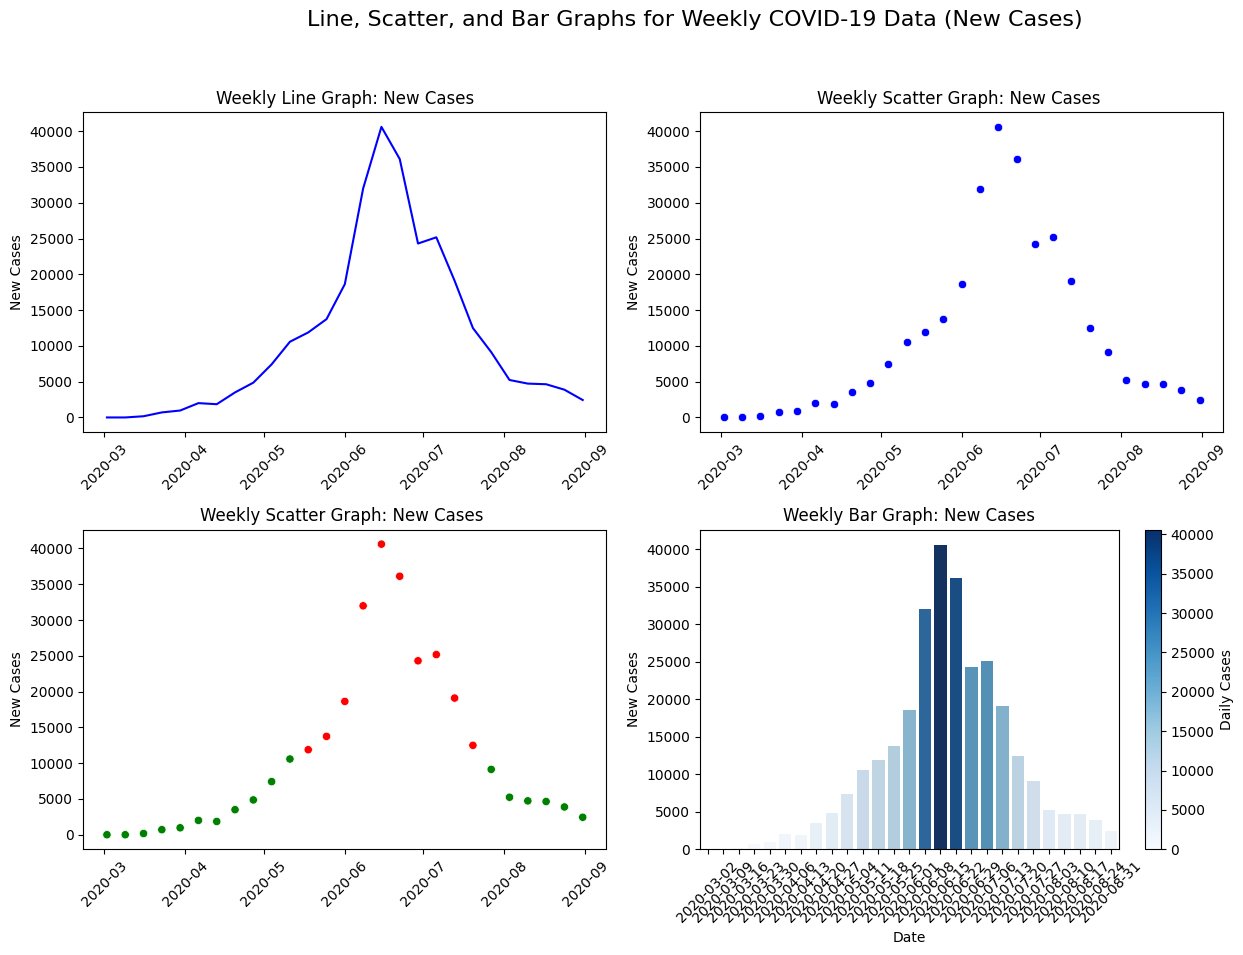

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a 2x2 subplot layout for various graph types
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Line, Scatter, and Bar Graphs for Weekly COVID-19 Data (New Cases)', fontsize=16)

# Line Graph for New Tests (Weekly)
sns.lineplot(ax=axes[0, 0], x='Date', y='Daily Cases', data=weekly_data, color='blue')
axes[0, 0].set_title('Weekly Line Graph: New Cases')
axes[0, 0].set_ylabel('New Cases')
axes[0, 0].set_xlabel('')
axes[0, 0].tick_params(axis='x', rotation=45)

# Scatter Graph for New Cases (Weekly) - Simple
sns.scatterplot(ax=axes[0, 1], x='Date', y='Daily Cases', data=weekly_data, color='blue')
axes[0, 1].set_title('Weekly Scatter Graph: New Cases ')
axes[0, 1].set_ylabel('New Cases')
axes[0, 1].set_xlabel('')
axes[0, 1].tick_params(axis='x', rotation=45)

# Scatter Graph for Daily Cases (Weekly) - Colored based on above/below average
avg_cases = weekly_data['Daily Cases'].mean()  # Calculate average for Daily Cases

# Create a new column for color based on the average
weekly_data['Color'] = np.where(weekly_data['Daily Cases'] > avg_cases, 'red', 'green')

# Define the colormap for the bar graph (assuming you want a different colormap)
cmap_bar = sns.color_palette("Blues", as_cmap=True)

# Create the scatter plots with colors directly
colors = weekly_data['Color'].tolist()  # Convert 'Color' column to a list
sns.scatterplot(ax=axes[1, 0], x='Date', y='Daily Cases', data=weekly_data, color=colors)
axes[1, 0].set_title('Weekly Scatter Graph: New Cases ')
axes[1, 0].set_ylabel('New Cases')
axes[1, 0].set_xlabel('')
axes[1, 0].tick_params(axis='x', rotation=45)

# Bar Graph for New Tests (Weekly) with colorbar
sns.barplot(ax=axes[1, 1], x='Date', y='Daily Cases', data=weekly_data, hue='Daily Cases', palette=cmap_bar, legend=False)
axes[1, 1].set_title('Weekly Bar Graph: New Cases')
axes[1, 1].set_ylabel('New Cases')
axes[1, 1].tick_params(axis='x', rotation=45)

# Create colorbar for the bar graph only
sm = plt.cm.ScalarMappable(cmap=cmap_bar, norm=plt.Normalize(vmin=weekly_data['Daily Cases'].min(), vmax=weekly_data['Daily Cases'].max()))
sm.set_array([])
fig.colorbar(sm, label='Daily Cases', orientation='vertical', ax=axes[1, 1])

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])
plt.show()

<ipython-input-8-364851b2d7a7>:43: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(ax=axes[1, 0], x='Month', y='Daily Tests', data=monthly_data, palette=colors)
<ipython-input-8-364851b2d7a7>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1, 1], x='Month', y='Daily Tests', data=monthly_data, palette='Blues', legend=False)


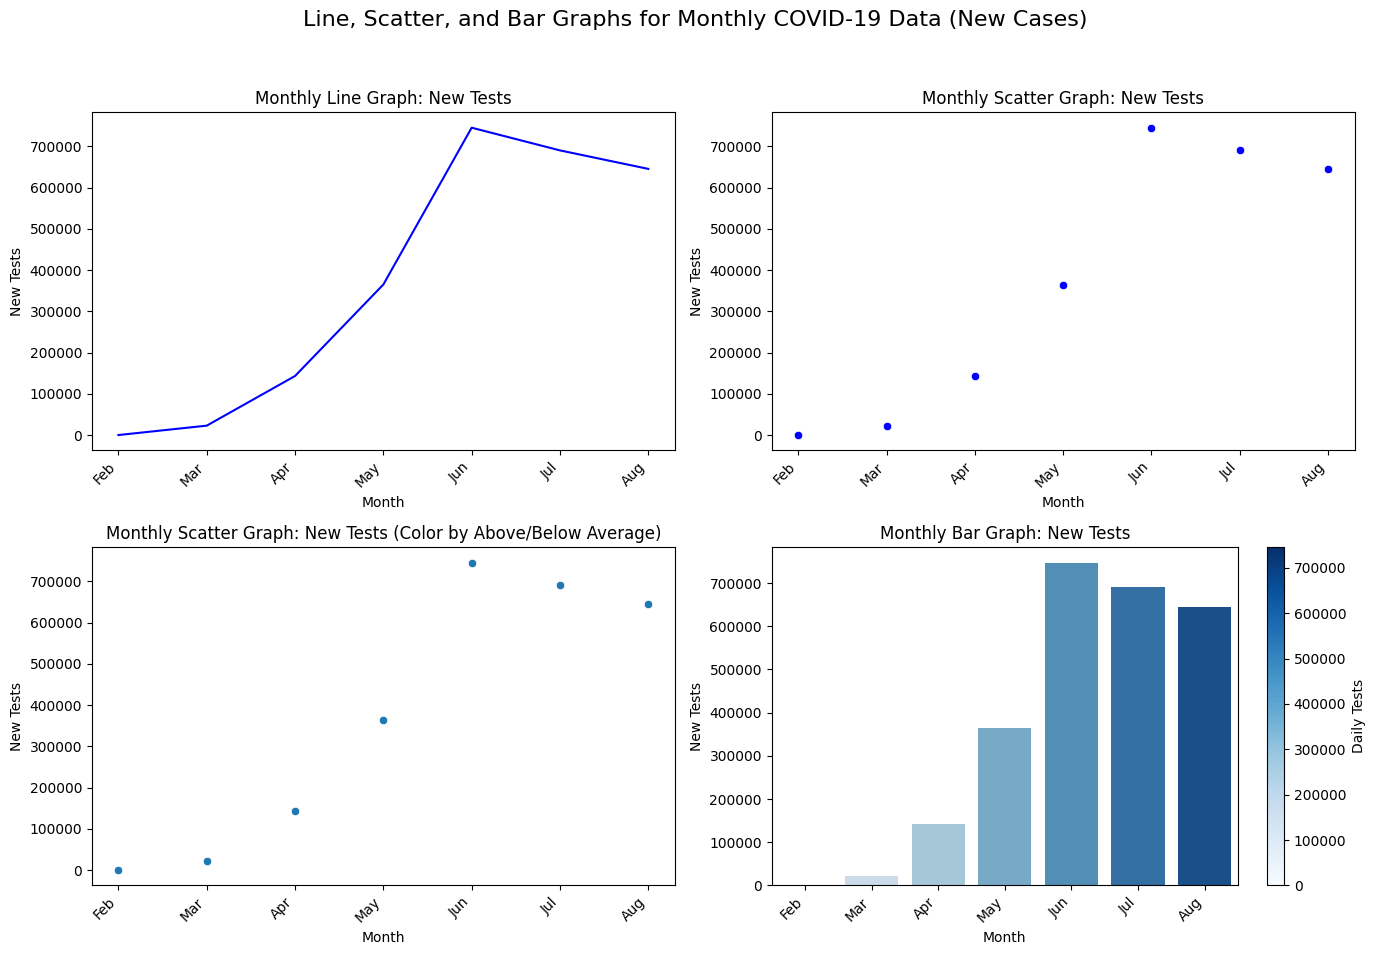

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import pandas as pd
import numpy as np
from matplotlib.dates import DateFormatter, MonthLocator

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Resample data to monthly intervals (group by months) with original index preserved
monthly_data = data.resample('M', on='Date').sum().reset_index()

# Create a new 'Month' column with month names for x-axis labels
monthly_data['Month'] = monthly_data['Date'].dt.strftime('%b')

# Create a 2x2 subplot layout for various graph types
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Line, Scatter, and Bar Graphs for Monthly COVID-19 Data (New Cases)', fontsize=16)

# Line Graph for Daily Tests (Monthly)
sns.lineplot(ax=axes[0, 0], x='Month', y='Daily Tests', data=monthly_data, color='blue')
axes[0, 0].set_title('Monthly Line Graph: New Tests')
axes[0, 0].set_ylabel('New Tests')
axes[0, 0].set_xlabel('')
axes[0, 0].tick_params(axis='x', rotation=45)

# Scatter Graph for Daily Tests (Monthly) - Simple
sns.scatterplot(ax=axes[0, 1], x='Month', y='Daily Tests', data=monthly_data, color='blue')
axes[0, 1].set_title('Monthly Scatter Graph: New Tests')
axes[0, 1].set_ylabel('New Tests')
axes[0, 1].set_xlabel('')
axes[0, 1].tick_params(axis='x', rotation=45)

# Calculate the average Daily Tests
avg_test = monthly_data['Daily Tests'].mean()

# Create a new column for color based on the average
monthly_data['Color'] = np.where(monthly_data['Daily Tests'] > avg_test, 'red', 'green')

# Scatter Graph with Colors Based on Above/Below Average
colors = monthly_data['Color'].tolist()
sns.scatterplot(ax=axes[1, 0], x='Month', y='Daily Tests', data=monthly_data, palette=colors)
axes[1, 0].set_title('Monthly Scatter Graph: New Tests (Color by Above/Below Average)')
axes[1, 0].set_ylabel('New Tests')
axes[1, 0].set_xlabel('')
axes[1, 0].tick_params(axis='x', rotation=45)

# Bar Graph for Daily Tests (Monthly) with Month Names on X-Axis
sns.barplot(ax=axes[1, 1], x='Month', y='Daily Tests', data=monthly_data, palette='Blues', legend=False)
axes[1, 1].set_title('Monthly Bar Graph: New Tests')
axes[1, 1].set_ylabel('New Tests')
axes[1, 1].tick_params(axis='x', rotation=45)

# Add colorbar for the Bar Graph
sm = plt.cm.ScalarMappable(cmap='Blues', norm=mpl.colors.Normalize(vmin=monthly_data['Daily Tests'].min(), vmax=monthly_data['Daily Tests'].max()))
sm.set_array([])
fig.colorbar(sm, label='Daily Tests', orientation='vertical', ax=axes[1, 1])

# Apply month names to the x-axis labels for all subplots
for ax in axes.flat:
    ax.set_xlabel('Month')
    ax.set_xticks(np.arange(len(monthly_data['Month'])))
    ax.set_xticklabels(monthly_data['Month'], rotation=45, ha='right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


<ipython-input-9-efbe96a8f9b2>:42: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(ax=axes[1, 0], x='Month', y='Daily Recoveries', data=monthly_data, palette=colors)
<ipython-input-9-efbe96a8f9b2>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1, 1], x='Month', y='Daily Recoveries', data=monthly_data, palette='Blues', legend=False)


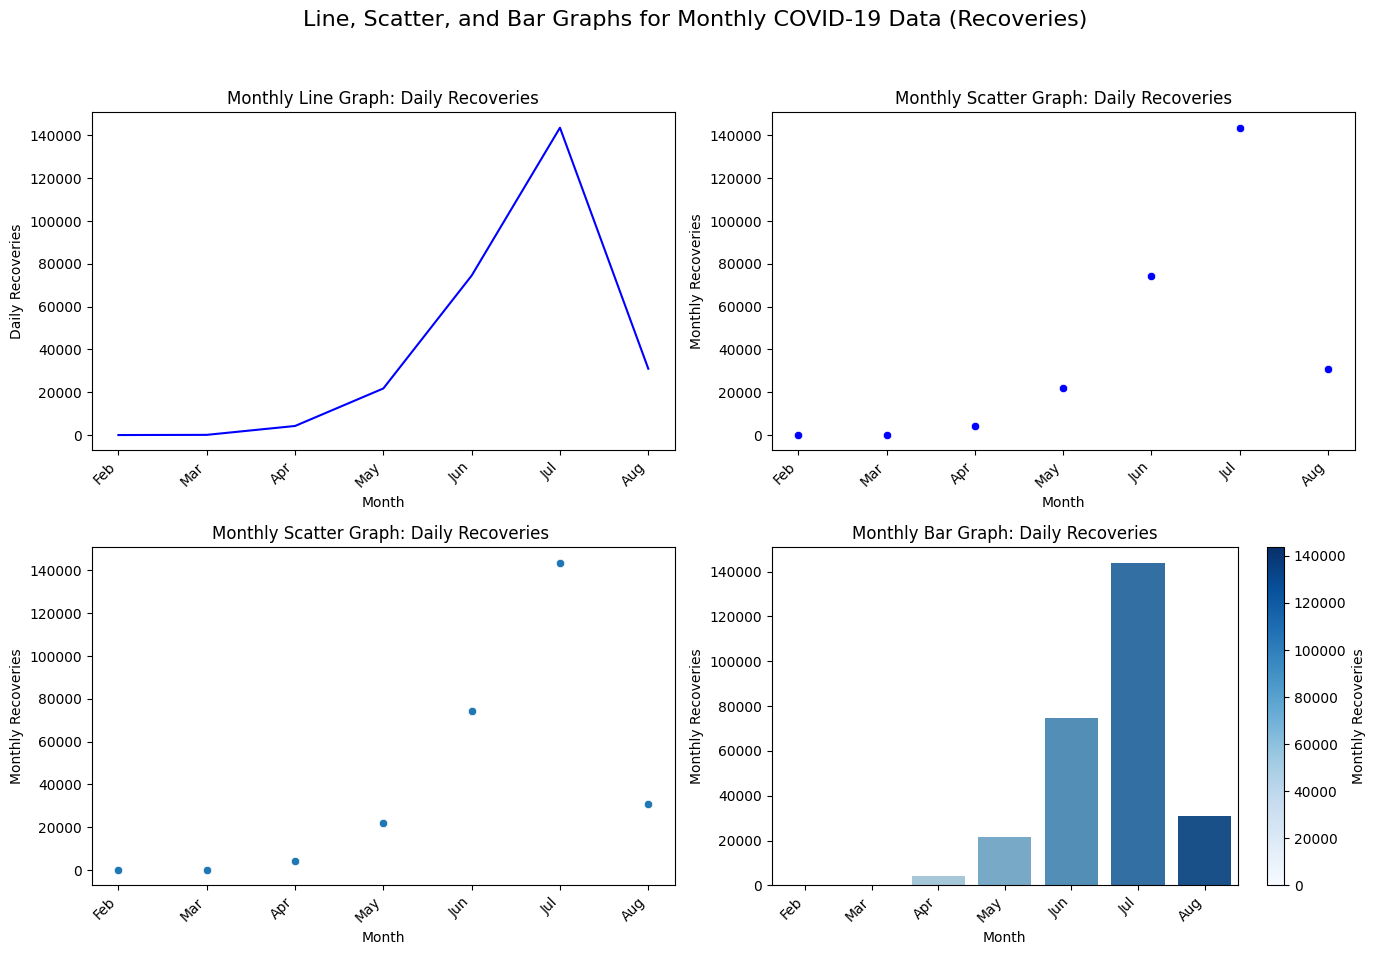

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import pandas as pd
import numpy as np

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Resample data to monthly intervals (group by months) with original index preserved
monthly_data = data.resample('M', on='Date').sum().reset_index()

# Create a new 'Month' column with month names for x-axis labels
monthly_data['Month'] = monthly_data['Date'].dt.strftime('%b')

# Create a 2x2 subplot layout for various graph types
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Line, Scatter, and Bar Graphs for Monthly COVID-19 Data (Recoveries)', fontsize=16)

# Line Graph for Daily Recoveries (Monthly)
sns.lineplot(ax=axes[0, 0], x='Month', y='Daily Recoveries', data=monthly_data, color='blue')
axes[0, 0].set_title('Monthly Line Graph: Daily Recoveries')
axes[0, 0].set_ylabel('Daily Recoveries')
axes[0, 0].set_xlabel('')
axes[0, 0].tick_params(axis='x', rotation=45)

# Scatter Graph for Daily Recoveries (Monthly) - Simple
sns.scatterplot(ax=axes[0, 1], x='Month', y='Daily Recoveries', data=monthly_data, color='blue')
axes[0, 1].set_title('Monthly Scatter Graph: Daily Recoveries')
axes[0, 1].set_ylabel('Monthly Recoveries')
axes[0, 1].set_xlabel('')
axes[0, 1].tick_params(axis='x', rotation=45)

# Calculate the average Monthly Recoveries
avg_recoveries = monthly_data['Daily Recoveries'].mean()

# Create a new column for color based on the average
monthly_data['Color'] = np.where(monthly_data['Daily Recoveries'] > avg_recoveries, 'red', 'green')

# Scatter Graph for Daily Recoveries with Colors Based on Above/Below Average
colors = monthly_data['Color'].tolist()
sns.scatterplot(ax=axes[1, 0], x='Month', y='Daily Recoveries', data=monthly_data, palette=colors)
axes[1, 0].set_title('Monthly Scatter Graph: Daily Recoveries ')
axes[1, 0].set_ylabel('Monthly Recoveries')
axes[1, 0].set_xlabel('')
axes[1, 0].tick_params(axis='x', rotation=45)

# Bar Graph for Daily Recoveries (Monthly) with Month Names on X-Axis
sns.barplot(ax=axes[1, 1], x='Month', y='Daily Recoveries', data=monthly_data, palette='Blues', legend=False)
axes[1, 1].set_title('Monthly Bar Graph: Daily Recoveries')
axes[1, 1].set_ylabel('Monthly Recoveries')
axes[1, 1].tick_params(axis='x', rotation=45)

# Add colorbar for the Bar Graph
sm = plt.cm.ScalarMappable(cmap='Blues', norm=mpl.colors.Normalize(vmin=monthly_data['Daily Recoveries'].min(), vmax=monthly_data['Daily Recoveries'].max()))
sm.set_array([])
fig.colorbar(sm, label='Monthly Recoveries', orientation='vertical', ax=axes[1, 1])

# Apply month names to the x-axis labels for all subplots
for ax in axes.flat:
    ax.set_xlabel('Month')
    ax.set_xticks(np.arange(len(monthly_data['Month'])))
    ax.set_xticklabels(monthly_data['Month'], rotation=45, ha='right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


<ipython-input-10-eb924c3ecd7b>:30: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(ax=axes[1, 0], x='Month', y='Daily Cases', data=monthly_data, palette=colors)


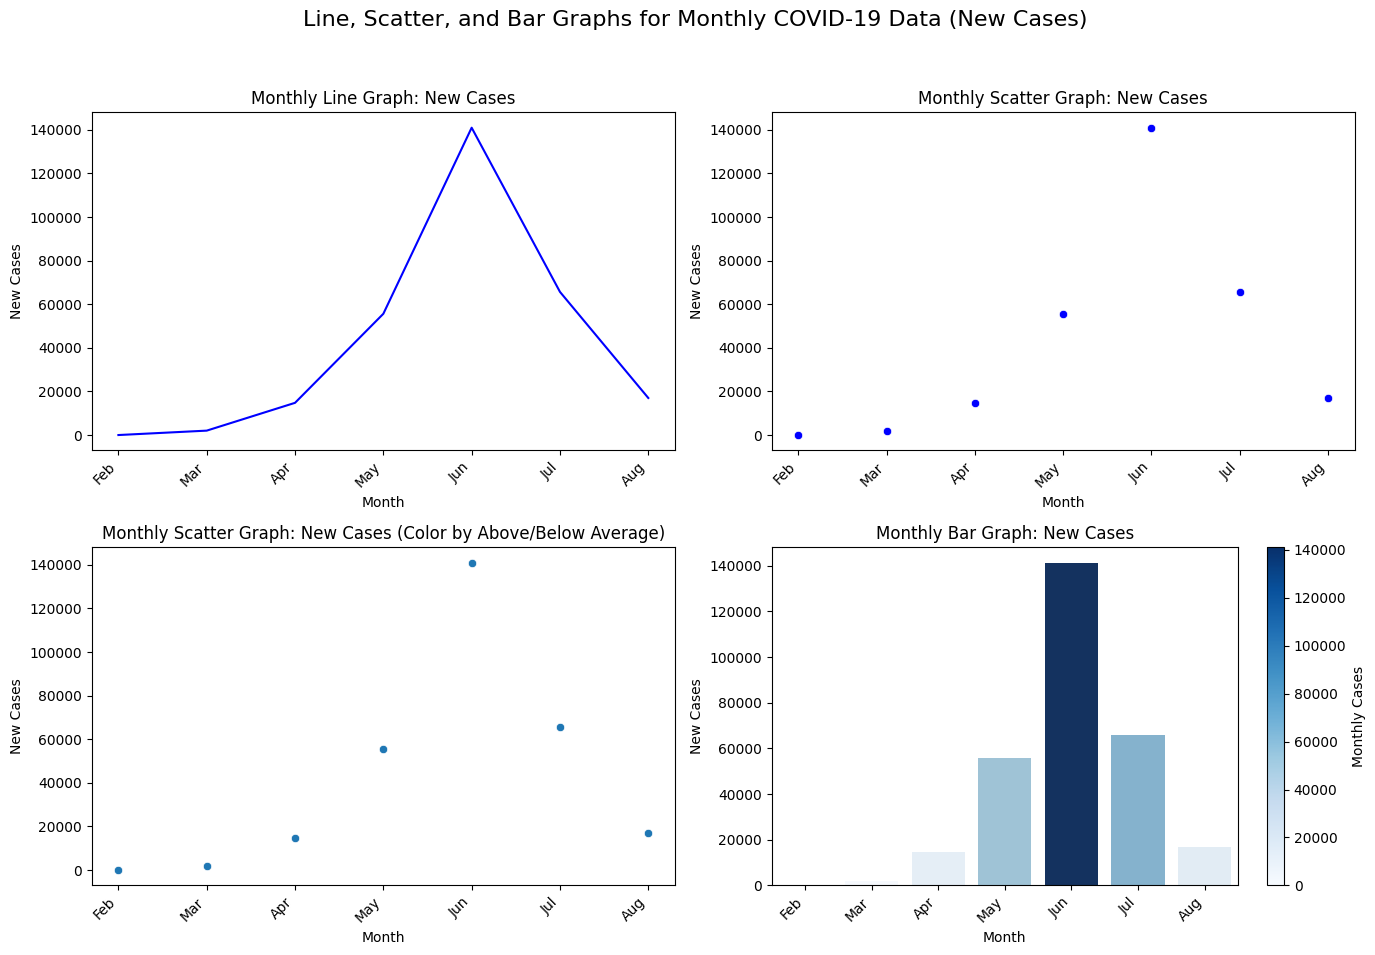

In [10]:
# Create a 2x2 subplot layout for various graph types
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Line, Scatter, and Bar Graphs for Monthly COVID-19 Data (New Cases)', fontsize=16)

# Line Graph for New Cases (Monthly)
sns.lineplot(ax=axes[0, 0], x='Month', y='Daily Cases', data=monthly_data, color='blue')
axes[0, 0].set_title('Monthly Line Graph: New Cases')
axes[0, 0].set_ylabel('New Cases')
axes[0, 0].set_xlabel('')
axes[0, 0].tick_params(axis='x', rotation=45)

# Scatter Graph for New Cases (Monthly) - Simple
sns.scatterplot(ax=axes[0, 1], x='Month', y='Daily Cases', data=monthly_data, color='blue')
axes[0, 1].set_title('Monthly Scatter Graph: New Cases')
axes[0, 1].set_ylabel('New Cases')
axes[0, 1].set_xlabel('')
axes[0, 1].tick_params(axis='x', rotation=45)

# Calculate the average Monthly Cases
avg_cases = monthly_data['Daily Cases'].mean()

# Create a new column for color based on the average
monthly_data['Color'] = np.where(monthly_data['Daily Cases'] > avg_cases, 'red', 'green')

# Define the colormap for the bar graph
cmap_bar = sns.color_palette("Blues", as_cmap=True)

# Scatter Graph for New Cases with Colors Based on Above/Below Average
colors = monthly_data['Color'].tolist()
sns.scatterplot(ax=axes[1, 0], x='Month', y='Daily Cases', data=monthly_data, palette=colors)
axes[1, 0].set_title('Monthly Scatter Graph: New Cases (Color by Above/Below Average)')
axes[1, 0].set_ylabel('New Cases')
axes[1, 0].set_xlabel('')
axes[1, 0].tick_params(axis='x', rotation=45)

# Bar Graph for New Tests (Monthly) with colorbar
sns.barplot(ax=axes[1, 1], x='Date', y='Daily Cases', data=monthly_data, hue='Daily Cases', palette=cmap_bar, legend=False)
axes[1, 1].set_title('Monthly Bar Graph: New Cases')
axes[1, 1].set_ylabel('New Cases')
axes[1, 1].tick_params(axis='x', rotation=45)


# Add colorbar for the Bar Graph
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=monthly_data['Daily Cases'].min(), vmax=monthly_data['Daily Cases'].max()))
sm.set_array([])
fig.colorbar(sm, label='Monthly Cases', orientation='vertical', ax=axes[1, 1])

# Apply month names to the x-axis labels for all subplots
for ax in axes.flat:
    ax.set_xlabel('Month')
    ax.set_xticks(np.arange(len(monthly_data['Month'])))
    ax.set_xticklabels(monthly_data['Month'], rotation=45, ha='right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**Q: Calculate Per Thousand & Million stats for Daily tests, cases, recoveries and deaths.**

In [11]:
population = 220  # Population in millions

data['Date'] = pd.to_datetime(data['Date'])

# Calculate per thousand and per million stats
monthly_data['Cases per Thousand'] = monthly_data['Daily Cases'] / (population * 1000)
monthly_data['Cases per Million'] = monthly_data['Daily Cases'] / population

monthly_data['Tests per Thousand'] = monthly_data['Daily Tests'] / (population * 1000)
monthly_data['Tests per Million'] = monthly_data['Daily Tests'] / population

monthly_data['Recoveries per Thousand'] = monthly_data['Daily Recoveries'] / (population * 1000)
monthly_data['Recoveries per Million'] = monthly_data['Daily Recoveries'] / population

monthly_data['Deaths per Thousand'] = monthly_data['Daily Deaths'] / (population * 1000)
monthly_data['Deaths per Million'] = monthly_data['Daily Deaths'] / population

# Calculate positive rate as (cases / tests) * 100
monthly_data['Positive Rate'] = (monthly_data['Daily Cases'] / monthly_data['Daily Tests']) * 100

# Create a summary table with required columns
summary_table = monthly_data[['Daily Tests', 'Daily Cases', 'Cases per Thousand', 'Cases per Million','Tests per Thousand','Tests per Million','Recoveries per Thousand','Recoveries per Million','Deaths per Thousand','Deaths per Million', 'Positive Rate']]

# Rename columns for clarity
summary_table.columns = ['Total Tests', 'Total Cases', 'Cases per Thousand', 'Cases per Million','Tests per Thousand','Tests per Million','Recoveries per Thousand','Recoveries per Million','Deaths per Thousand','Deaths per Million', 'Positive Rate (%)']

# Display the summary table
print(summary_table)


   Total Tests  Total Cases  Cases per Thousand  Cases per Million  \
0          0.0          0.0            0.000000           0.000000   
1      22763.0       2021.0            0.009186           9.186364   
2     143163.0      14778.0            0.067173          67.172727   
3     365062.0      55638.0            0.252900         252.900000   
4     745419.0     141010.0            0.640955         640.954545   
5     690360.0      65676.0            0.298527         298.527273   
6     645510.0      17003.0            0.077286          77.286364   

   Tests per Thousand  Tests per Million  Recoveries per Thousand  \
0            0.000000           0.000000                 0.000000   
1            0.103468         103.468182                 0.000373   
2            0.650741         650.740909                 0.019241   
3            1.659373        1659.372727                 0.098945   
4            3.388268        3388.268182                 0.338723   
5            3.138000    

**Q: Train and implement ML model(any two) to predict the future trend of daily cases and deaths.**

**Model 1 & 2 : 'Random Forest Regressor & Support Vector Regressor'**

In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = data[["Date_ordinal"]]
y_cases = data["Daily Cases"]
y_deaths = data["Daily Deaths"]
y_recoveries = data["Daily Recoveries"]

# Train-Test Split
X_train, X_test, y_train_cases, y_test_cases = train_test_split(X, y_cases, test_size=0.2, random_state=0)
X_train, X_test, y_train_deaths, y_test_deaths = train_test_split(X, y_deaths, test_size=0.2, random_state=0)
X_train, X_test, y_train_recoveries, y_test_recoveries = train_test_split(X, y_recoveries, test_size=0.2, random_state=0)

# Random Forest Regressor for Cases Prediction
rf_model_cases = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model_cases.fit(X_train, y_train_cases)

# Support Vector Regressor for Deaths Prediction
svr_model_deaths = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model_deaths.fit(X_train, y_train_deaths)

# Random Forest Regressor
rf_model_recoveries = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model_recoveries.fit(X_train, y_train_recoveries)

# Make predictions on the test set for recoveries
y_pred_cases = rf_model_cases.predict(X_test)
y_pred_deaths = svr_model_deaths.predict(X_test)
y_pred_recoveries = rf_model_recoveries.predict(X_test)

# Model Evaluation (MSE & R-squared)
mse_cases_rf = mean_squared_error(y_test_cases, y_pred_cases)
mse_deaths_svr = mean_squared_error(y_test_deaths, y_pred_deaths)
mse_recoveries_rf = mean_squared_error(y_test_recoveries, y_pred_recoveries)

r2_cases_rf = r2_score(y_test_cases, y_pred_cases)
r2_deaths_svr = r2_score(y_test_deaths, y_pred_deaths)
r2_recoveries_rf = r2_score(y_test_recoveries, y_pred_recoveries)

print(f"Mean Squared Error for Random Forest Cases Prediction: {mse_cases_rf}")
print(f"R-squared for Random Forest Cases Prediction: {r2_cases_rf:.2f}")
print(f"Mean Squared Error for SVR Deaths Prediction: {mse_deaths_svr}")
print(f"R-squared for SVR Deaths Prediction: {r2_deaths_svr:.2f}")
print(f"Mean Squared Error for Random Forest Recoveries Prediction: {mse_recoveries_rf}")
print(f"R-squared for Random Forest Recoveries Prediction: {r2_recoveries_rf:.2f}")

# User Input and Prediction
while True:
    try:
        user_date_str = input("Enter a date in YYYY-MM-DD format (e.g., 2024-08-25): ")
        user_date_obj = pd.to_datetime(user_date_str)
        user_date_ordinal = user_date_obj.toordinal()
        break
    except ValueError:
        print("Invalid date format. Please try again.")

user_date_prediction_cases = rf_model_cases.predict([[user_date_ordinal]])[0]
user_date_prediction_deaths = svr_model_deaths.predict([[user_date_ordinal]])[0]
user_date_prediction_recoveries = rf_model_recoveries.predict([[user_date_ordinal]])[0]

print(f"Predicted Daily Cases for {user_date_str}: {user_date_prediction_cases:.2f}")
print(f"Predicted Daily Deaths for {user_date_str}: {user_date_prediction_deaths:.2f}")
print(f"Predicted Daily Recoveries for {user_date_str}: {user_date_prediction_recoveries:.2f}")

Mean Squared Error for Random Forest Cases Prediction: 134143.94742105258
R-squared for Random Forest Cases Prediction: 0.96
Mean Squared Error for SVR Deaths Prediction: 218.67301790074313
R-squared for SVR Deaths Prediction: 0.85
Mean Squared Error for Random Forest Recoveries Prediction: 6434073.131532975
R-squared for Random Forest Recoveries Prediction: 0.35
Enter a date in YYYY-MM-DD format (e.g., 2024-08-25): 2024-10-10
Predicted Daily Cases for 2024-10-10: 240.26
Predicted Daily Deaths for 2024-10-10: 27.87
Predicted Daily Recoveries for 2024-10-10: 188.84


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


**Model 3 & 4: 'Linear Regression' & 'SARIMA'**

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Data Preprocessing
data['Date'] = pd.to_datetime(data['Date'])
data['Date_ordinal'] = data['Date'].map(pd.Timestamp.toordinal)

# Handle missing values by filling with column mean
data['Daily Cases'].fillna(data['Daily Cases'].mean(), inplace=True)
data['Daily Deaths'].fillna(data['Daily Deaths'].mean(), inplace=True)
data['Daily Recoveries'].fillna(data['Daily Recoveries'].mean(), inplace=True)

# Prepare the input (X) and output (y) variables for Linear Regression
X = data[['Date_ordinal']]
y_cases = data['Daily Cases']
y_deaths = data['Daily Deaths']
y_recoveries = data['Daily Recoveries']

# Train-Test Split
X_train, X_test, y_train_cases, y_test_cases = train_test_split(X, y_cases, test_size=0.2, random_state=0)
X_train, X_test, y_train_deaths, y_test_deaths = train_test_split(X, y_deaths, test_size=0.2, random_state=0)
X_train, X_test, y_train_recoveries, y_test_recoveries = train_test_split(X, y_recoveries, test_size=0.2, random_state=0)

# Train Linear Regression for each target (cases, deaths, recoveries)
lr_model_cases = LinearRegression()
lr_model_deaths = LinearRegression()
lr_model_recoveries = LinearRegression()

# Train the models
lr_model_cases.fit(X_train, y_train_cases)
lr_model_deaths.fit(X_train, y_train_deaths)
lr_model_recoveries.fit(X_train, y_train_recoveries)

# Make predictions with Linear Regression
y_pred_cases_lr = lr_model_cases.predict(X_test)
y_pred_deaths_lr = lr_model_deaths.predict(X_test)
y_pred_recoveries_lr = lr_model_recoveries.predict(X_test)

# Evaluate the Linear Regression model
mse_cases_lr = mean_squared_error(y_test_cases, y_pred_cases_lr)
mae_cases_lr = mean_absolute_error(y_test_cases, y_pred_cases_lr)
r2_cases_lr = r2_score(y_test_cases, y_pred_cases_lr)

mse_deaths_lr = mean_squared_error(y_test_deaths, y_pred_deaths_lr)
mae_deaths_lr = mean_absolute_error(y_test_deaths, y_pred_deaths_lr)
r2_deaths_lr = r2_score(y_test_deaths, y_pred_deaths_lr)

mse_recoveries_lr = mean_squared_error(y_test_recoveries, y_pred_recoveries_lr)
mae_recoveries_lr = mean_absolute_error(y_test_recoveries, y_pred_recoveries_lr)
r2_recoveries_lr = r2_score(y_test_recoveries, y_pred_recoveries_lr)

# Print Linear Regression Evaluation Metrics
print("=== Linear Regression Evaluation Results ===")
print(f"Cases - MSE: {mse_cases_lr}, MAE: {mae_cases_lr}, R2: {r2_cases_lr}")
print(f"Deaths - MSE: {mse_deaths_lr}, MAE: {mae_deaths_lr}, R2: {r2_deaths_lr}")
print(f"Recoveries - MSE: {mse_recoveries_lr}, MAE: {mae_recoveries_lr}, R2: {r2_recoveries_lr}")

# Train SARIMA Model for Time Series Forecasting
data.set_index('Date', inplace=True)

# Train SARIMA models for each target
sarima_model_cases = SARIMAX(data['Daily Cases'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_model_deaths = SARIMAX(data['Daily Deaths'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_model_recoveries = SARIMAX(data['Daily Recoveries'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

sarima_fit_cases = sarima_model_cases.fit(disp=False)
sarima_fit_deaths = sarima_model_deaths.fit(disp=False)
sarima_fit_recoveries = sarima_model_recoveries.fit(disp=False)

# User Input for Date Prediction
user_date_input = input("Enter a date for prediction (YYYY-MM-DD): ")
user_date = pd.to_datetime(user_date_input)

# Make predictions using SARIMA model
user_prediction_cases_sarima = sarima_fit_cases.predict(start=user_date, end=user_date)
user_prediction_deaths_sarima = sarima_fit_deaths.predict(start=user_date, end=user_date)
user_prediction_recoveries_sarima = sarima_fit_recoveries.predict(start=user_date, end=user_date)

# Print SARIMA predictions for the user-input date
print(f"Predicted Daily Cases for {user_date_input} (SARIMA): {user_prediction_cases_sarima.iloc[0]:.0f}")
print(f"Predicted Daily Deaths for {user_date_input} (SARIMA): {user_prediction_deaths_sarima.iloc[0]:.0f}")
print(f"Predicted Daily Recoveries for {user_date_input} (SARIMA): {user_prediction_recoveries_sarima.iloc[0]:.0f}")

# Compare with Linear Regression for User-Entered Date
user_date_ordinal = user_date.toordinal()
user_prediction_cases_lr = lr_model_cases.predict(np.array([[user_date_ordinal]]))
user_prediction_deaths_lr = lr_model_deaths.predict(np.array([[user_date_ordinal]]))
user_prediction_recoveries_lr = lr_model_recoveries.predict(np.array([[user_date_ordinal]]))

# Print Linear Regression predictions for the user-input date
print(f"Predicted Daily Cases for {user_date_input} (Linear Regression): {user_prediction_cases_lr[0]:.0f}")
print(f"Predicted Daily Deaths for {user_date_input} (Linear Regression): {user_prediction_deaths_lr[0]:.0f}")
print(f"Predicted Daily Recoveries for {user_date_input} (Linear Regression): {user_prediction_recoveries_lr[0]:.0f}")

=== Linear Regression Evaluation Results ===
Cases - MSE: 3505601.258517829, MAE: 1454.030299414219, R2: 0.04869965268735865
Deaths - MSE: 1518.4066530558512, MAE: 32.07532144316946, R2: -0.007679785415688478
Recoveries - MSE: 9346315.445004635, MAE: 1662.891763845042, R2: 0.055026149632554366


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

Enter a date for prediction (YYYY-MM-DD): 2024-10-10
Predicted Daily Cases for 2024-10-10 (SARIMA): 2502
Predicted Daily Deaths for 2024-10-10 (SARIMA): -44
Predicted Daily Recoveries for 2024-10-10 (SARIMA): 25096
Predicted Daily Cases for 2024-10-10 (Linear Regression): 15137
Predicted Daily Deaths for 2024-10-10 (Linear Regression): 216
Predicted Daily Recoveries for 2024-10-10 (Linear Regression): 22888


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
